In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [2]:
base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"


In [3]:
import os

file_path = base + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb


4.435338973999023

In [4]:
import pandas as pd

base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(base + "train.csv")
df_sample = pd.read_csv(base + "sample_submission.csv")

print("Train shape:", df_train.shape)
df_train.head()


Train shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [5]:
print("Train shape:", df_train.shape)
print("\nColumns:", df_train.columns)

df_train.info()
df_train.describe(include="all")


Train shape: (67914, 8)

Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
count,67914,67914,67914.000000,67914,36096.000000,36096.000000,36096.000000,36096.000000
unique,15000,15,NaN,17,NaN,NaN,NaN,NaN
top,03e6ecfa6f6fb33dfeac6ca4f9b459c9,No finding,NaN,R9,NaN,NaN,NaN,NaN
freq,57,31818,NaN,15708,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.979312,NaN,1051.332696,1065.262051,1492.269337,1456.660489
std,NaN,NaN,5.036494,NaN,565.838078,552.925133,595.384126,581.134138
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,68.000000,103.000000
25%,NaN,NaN,7.000000,NaN,602.000000,627.000000,1010.000000,1009.000000
50%,NaN,NaN,13.000000,NaN,1014.500000,935.000000,1567.000000,1411.000000
75%,NaN,NaN,14.000000,NaN,1457.000000,1471.000000,1947.000000,1911.000000


In [6]:
df_train['class_name'].value_counts()


class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64

In [7]:
(df_train['class_name'] == "No finding").sum()


31818

In [8]:
df_train['image_id'].nunique()


15000

In [9]:
df_train.isna().sum()


image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

(-0.5, 1993.5, 2429.5, -0.5)

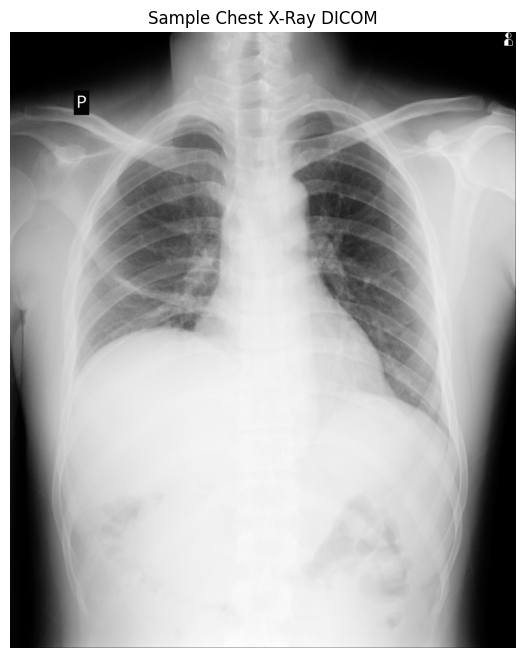

In [10]:
import pydicom
import matplotlib.pyplot as plt
import random

test_path = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/"

sample_file = random.choice(os.listdir(test_path))
dicom_path = os.path.join(test_path, sample_file)

ds = pydicom.dcmread(dicom_path)
img = ds.pixel_array

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title("Sample Chest X-Ray DICOM")
plt.axis('off')


In [2]:
import os
import pandas as pd
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
import random

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

# File size check
file_path = BASE + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb

4.435338973999023

In [3]:
df_train = pd.read_csv(BASE + "train.csv")
df_sample = pd.read_csv(BASE + "sample_submission.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)

df_train.head()
df_train.info()
df_train.describe(include="all")

df_train['class_name'].value_counts()
print("No finding count:", (df_train['class_name']=="No finding").sum())
print("Unique images:", df_train['image_id'].nunique())
df_train.isna().sum()

Train shape: (67914, 8)
Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB
No finding count: 31818
Unique images: 15000


image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

(-0.5, 2377.5, 2664.5, -0.5)

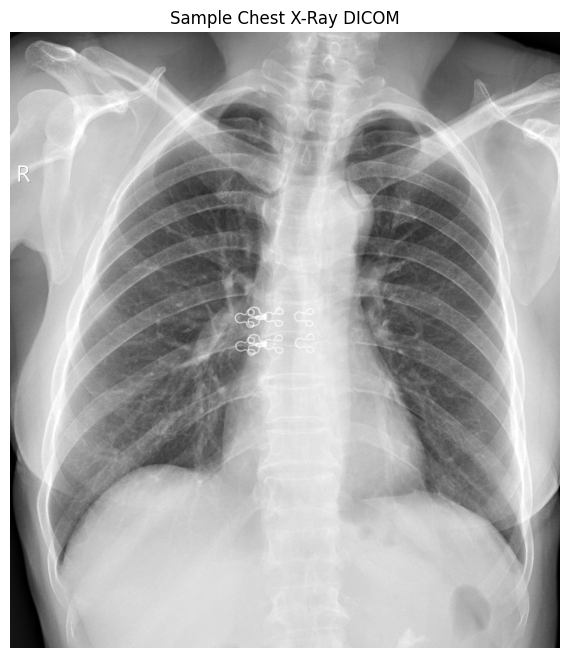

In [4]:
test_path = BASE + "test/"
sample_file = random.choice(os.listdir(test_path))
dicom_path = os.path.join(test_path, sample_file)

ds = pydicom.dcmread(dicom_path)
img = ds.pixel_array

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.title("Sample Chest X-Ray DICOM")
plt.axis('off')

In [27]:
BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(BASE + "train.csv")
df_sample = pd.read_csv(BASE + "sample_submission.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)

df_train.head()


Train shape: (67914, 8)
Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [29]:

#     IMPORT LIBRARIES

import os
import cv2
import pydicom
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
TRAIN_DICOM = BASE + "train/"
TRAIN_CSV = BASE + "train.csv"

# Create output dirs
OUTPUT_DIR = "/kaggle/working/processed_images/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR + "images/", exist_ok=True)
os.makedirs(OUTPUT_DIR + "labels/", exist_ok=True)


In [30]:
import os
import cv2
import random
import shutil
import pydicom
import numpy as np
import pandas as pd
from tqdm import tqdm


In [ ]:
BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
TRAIN_DICOM = BASE + "train/"
TRAIN_CSV = BASE + "train.csv"

OUT_DIR = "/kaggle/working/preprocessed/"
os.makedirs(OUT_DIR, exist_ok=True)


In [ ]:
df = pd.read_csv(TRAIN_CSV)

# for  1000 images
unique_imgs = df['image_id'].unique()[:1000]
df = df[df['image_id'].isin(unique_imgs)]

print("Processing images:", len(unique_imgs))


In [18]:
def load_dicom(path):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)
    return img


In [7]:
def clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

print(" clahe() function loaded.")


✔️ clahe() function loaded.


In [8]:
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

print("denoise() function loaded.")


✔️ denoise() function loaded.


In [9]:
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]

print(" crop_borders() function loaded.")


✔️ crop_borders() function loaded.


In [14]:
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    padded = np.zeros((size, size), dtype=np.uint8)
    padded[:h, :w] = img
    return padded

print(" pad_to_square() function loaded.")


✔️ pad_to_square() function loaded.


In [16]:
def resize(img, size=512):
    return cv2.resize(img, (size, size))

print(" resize() function loaded.")



✔️ resize() function loaded.


In [18]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w/2
    yc = y_min + h/2

    return [
        0,                # class_id
        xc / img_w,       # x_center
        yc / img_h,       # y_center
        w / img_w,        # width
        h / img_h         # height
    ]

print(" convert_to_yolo() function loaded.")

    


✔️ convert_to_yolo() function loaded.


In [20]:
import pandas as pd

TRAIN_CSV = BASE + "train.csv"   # or your correct path
df_train = pd.read_csv(TRAIN_CSV)

print(" df_train loaded successfully!")
print(df_train.head())


✔️ df_train loaded successfully!
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
#yolo_annotations = {}

#for _, row in df_train.iterrows():
   # img_id = row["image_id"]
   # box = [row["x_min"], row["y_min"], row["x_max"], row["y_max"]]

    #if img_id not in yolo_annotations:
        #yolo_annotations[img_id] = []

   # yolo_annotations[img_id].append(
       # convert_to_yolo(box, row["width"], row["height"])
    #)

#print("YOLO annotations dictionary created.")


In [22]:
df_train.columns


Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')

In [23]:
def get_image_size(image_id):
    dicom_path = os.path.join(BASE + "train/", image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    h, w = d.pixel_array.shape
    return w, h


In [26]:
df_train.columns.tolist()


['image_id',
 'class_name',
 'class_id',
 'rad_id',
 'x_min',
 'y_min',
 'x_max',
 'y_max']

In [27]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
train_path = BASE + "train/"


In [28]:
df_train = pd.read_csv(BASE + "train.csv")
df_train.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [29]:
def get_image_size(image_id):
    dicom_path = os.path.join(train_path, image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    arr = d.pixel_array
    h, w = arr.shape
    return w, h


In [30]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w / 2
    yc = y_min + h / 2

    return [
        0,               # class_id (set to 0 for now)
        xc / img_w,
        yc / img_h,
        w / img_w,
        h / img_h
    ]


In [31]:
df_small = df_train.head(1000)

yolo_annotations = {}

for _, row in tqdm(df_small.iterrows(), total=len(df_small)):
    
    img_id = row["image_id"]
    box = [row["x_min"], row["y_min"], row["x_max"], row["y_max"]]
    
    # Read image size from DICOM
    w, h = get_image_size(img_id)
    
    if img_id not in yolo_annotations:
        yolo_annotations[img_id] = []
    
    yolo_annotations[img_id].append(
        convert_to_yolo(box, w, h)
    )

print(" YOLO annotations created for 1000 images")


100%|██████████| 1000/1000 [16:26<00:00,  1.01it/s]

✔️ YOLO annotations created for 1000 images


In [32]:
# 1. Load DICOM
def load_dicom(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(float)
    return img

# 2. Min-Max Normalize
def normalize(img):
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return (img * 255).astype("uint8")

# 3. CLAHE
def apply_clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

# 4. Light Denoising
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

# 5. Crop borders
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]

# 6. Pad to square
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    canvas = np.zeros((size, size), dtype=np.uint8)
    canvas[:h, :w] = img
    return canvas

# 7. Resize
def resize(img, size=512):
    return cv2.resize(img, (size, size))

# Combine all preprocessing
def preprocess_image(path):
    img = load_dicom(path)
    img = normalize(img)
    img = apply_clahe(img)
    img = denoise(img)
    img = crop_borders(img)
    img = pad_to_square(img)
    img = resize(img)
    return img


In [33]:
SAVE_DIR = "/kaggle/working/preprocessed/"
IMG_DIR = SAVE_DIR + "images/"
LBL_DIR = SAVE_DIR + "labels/"

os.makedirs(IMG_DIR, exist_ok=True)
os.makedirs(LBL_DIR, exist_ok=True)

print("Save paths ready.")


Save paths ready.


In [34]:
count = 0

for img_id, labels in tqdm(yolo_annotations.items(), total=len(yolo_annotations)):
    
    dicom_path = os.path.join(train_path, img_id + ".dicom")

    try:
        # Preprocess image
        processed_img = preprocess_image(dicom_path)

        # Save Image (PNG)
        out_path = os.path.join(IMG_DIR, img_id + ".png")
        cv2.imwrite(out_path, processed_img)

        # Save YOLO label file
        label_path = os.path.join(LBL_DIR, img_id + ".txt")

        with open(label_path, "w") as f:
            for lab in labels:
                class_id, xc, yc, w, h = lab
                f.write(f"{class_id} {xc} {yc} {w} {h}\n")

        count += 1

    except Exception as e:
        print("Skipping:", img_id, "| Error:", e)

print(f"\n Completed preprocessing {count} images with YOLO labels.")
print("Saved inside:", SAVE_DIR)


100%|██████████| 952/952 [16:42<00:00,  1.05s/it]


 Completed preprocessing 952 images with YOLO labels.
Saved inside: /kaggle/working/preprocessed/


In [35]:
   !pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 40.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [36]:
import os

base_path = "/kaggle/working/preprocessed"

# Define all required folders
folders = [
    "images",
    "labels",
    "images/train",
    "images/val",
    "labels/train",
    "labels/val"
]

# Create folders
for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)
    print("Created:", path)

print("\n YOLO folder structure created successfully!")


Created: /kaggle/working/preprocessed/images
Created: /kaggle/working/preprocessed/labels
Created: /kaggle/working/preprocessed/images/train
Created: /kaggle/working/preprocessed/images/val
Created: /kaggle/working/preprocessed/labels/train
Created: /kaggle/working/preprocessed/labels/val

 YOLO folder structure created successfully!


In [37]:
import os, shutil, random
from sklearn.model_selection import train_test_split

base_path = "/kaggle/working/preprocessed"
img_path = os.path.join(base_path, "images")
lbl_path = os.path.join(base_path, "labels")

train_img = os.path.join(base_path, "images/train")
val_img = os.path.join(base_path, "images/val")
train_lbl = os.path.join(base_path, "labels/train")
val_lbl = os.path.join(base_path, "labels/val")

# Create folders
for p in [train_img, val_img, train_lbl, val_lbl]:
    os.makedirs(p, exist_ok=True)

images = os.listdir(img_path)
images = [f for f in images if f.endswith(".png")]

train_files, val_files = train_test_split(images, test_size=0.1, random_state=42)

# Move train files
for f in train_files:
    shutil.move(os.path.join(img_path, f), os.path.join(train_img, f))
    label = f.replace(".png", ".txt")
    shutil.move(os.path.join(lbl_path, label), os.path.join(train_lbl, label))

# Move val files
for f in val_files:
    shutil.move(os.path.join(img_path, f), os.path.join(val_img, f))
    label = f.replace(".png", ".txt")
    shutil.move(os.path.join(lbl_path, label), os.path.join(val_lbl, label))

print(f"Train images: {len(train_files)}, Val images: {len(val_files)}")


Train images: 856, Val images: 96


In [38]:
data_yaml = """
path: /kaggle/working/preprocessed
train: images/train
val: images/val

names:
  0: class_0
  1: class_1
"""

with open("/kaggle/working/preprocessed/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created!")


data.yaml created!


In [39]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano model
model.train(
    data="/kaggle/working/preprocessed/data.yaml",
    epochs=25,
    imgsz=512,
    batch=16,
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/preprocessed/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=

/usr/local/lib/python3.11/dist-packages/ultralytics/data/utils.py:218: RuntimeWarning: invalid value encountered in less_equal
  assert points.max() <= 1.01, f"non-normalized or out of bounds coordinates {points[points > 1.01]}"
/usr/local/lib/python3.11/dist-packages/ultralytics/data/utils.py:218: RuntimeWarning: invalid value encountered in greater
  assert points.max() <= 1.01, f"non-normalized or out of bounds coordinates {points[points > 1.01]}"


train: Scanning /kaggle/working/preprocessed/labels/train... 856 images, 0 backgrounds, 402 corrupt: 100% ━━━━━━━━━━━━ 856/856 426.0it/s 2.0s0.1s
train: /kaggle/working/preprocessed/images/train/000434271f63a053c4128a0ba6352c7f.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates []
train: /kaggle/working/preprocessed/images/train/00dc70e84d141255f7fc6f8038bdd72e.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates []
train: /kaggle/working/preprocessed/images/train/012969950fbdd28bb50cfa447877cd4e.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates []
train: /kaggle/working/preprocessed/images/train/0459d43804df005b79d9b248690cf777.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates []
train: /kaggle/working/preprocessed/images/train/04bf8b28859a541087d3186c932e27e6.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates []
train: /kaggle/working/preprocesse

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         46         48      0.269      0.167     0.0819     0.0262
               class_0         46         48      0.269      0.167     0.0819     0.0262
Speed: 1.0ms preprocess, 121.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7924a4fda610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 